<a href="https://colab.research.google.com/github/sunnylistax25/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt 
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

**Getting the Data**

In [2]:
# read_csv() function helps to read comma seperated files(CSV) and here we assign the files to the respectice variables.
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

**Data Exploration/Analysis**

In [3]:
# The info() function is a method which provides a summary.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Features with short description**

* survival: Survival
*PassengerId: Unique Id of a passenger.
*pclass: Ticket class
*sex: Sex
*Age: Age in years
*sibsp: # of siblings / spouses abroad the Titanic
*parch: # of parents / children abroad the Titanic
*ticket: Ticket number
*fare: Passenger fare
*cabin: Cabin number
embarked: Port of Embarkation

In [4]:
# describe() function used to generate descriptive statistics of the a pandas 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# head() function displays the first 5 rows of a DataFrame by default
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
# finding the amount of missing/null data in the dataframe and its percentage 
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/ train_df.isnull().count() * 100
percent_2 = (round(percent_1,1).sort_values(ascending=False))
missing_data = pd.concat([total,percent_2], axis=1, keys=['Total','%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
# values(title) of all the columns in our dataframe
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

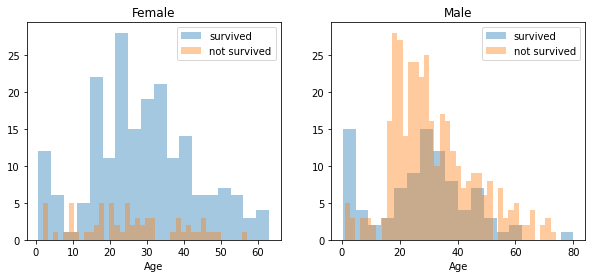

In [8]:
survived = 'survived'
not_survived = 'not survived'

# sublot() creates mathmatical plots for our understanding and here nrows & ncols produces the number of plots.
# figsize adjusts the size of the plot to be created
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# sns.distplot creates a histogram plot of the given data
# dropna() removes rows with missing('NaN') values
# bins specifies the number of bins to be used in the histogram
# label sets the label for the data being plotted
# ax specifies which subplot to draw the histogram on.
# kde sets whether to plot a kernel density estimate(KDE) curve on top of the histogram
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), 
                  bins=18, label = survived, ax = axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), 
                  bins=40, label = not_survived, ax = axes[0], kde=False)
# legend is a graphical element which displays the various elements represented in the graph
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), 
                  bins=18, label = survived, ax =axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), 
                 bins=40, label= not_survived, ax = axes[1], kde=False)
ax.legend()
ax.set_title('Male')

**Embarked, Pclass and Sex**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


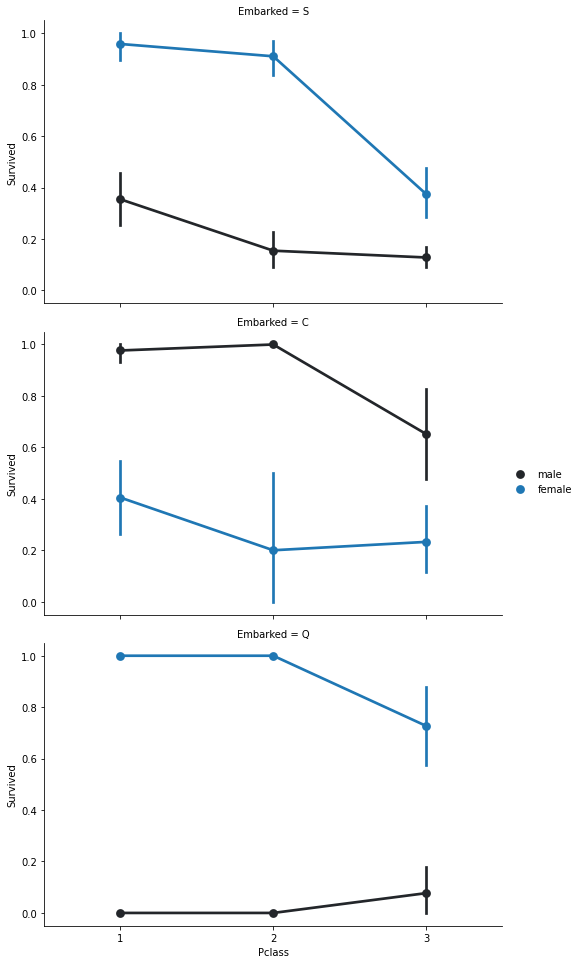

In [9]:
# FaceGrid is a class from the seaborn library that is used to create a grid of plots
# facegrid takes the following argument 1) a pandas dataframe 2) row: a column name or a list of column names that specifies which sublplots to show on seperate rows
# 3) size: the height of each facet 4) aspect: the width of each facet/height
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect = 1.6)
# map is a method for creating multiple plots that are conditionally dependent on a sepecific variable which is called the facet variable
# palette, order, hue_order are used to specify the colors to use for plot, the order in which the levels of the variable should be plotted, and the order in which the levels of the hue variable should be plotted 
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

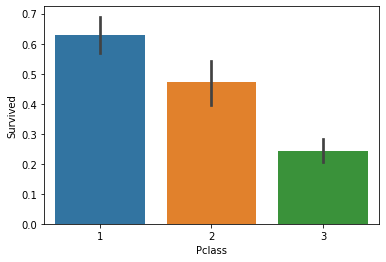

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


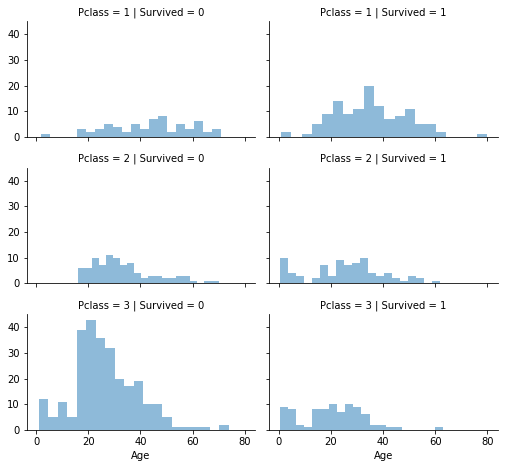

In [11]:
grid = sns.FacetGrid(train_df,col='Survived', row='Pclass', size=2.2, aspect=1.6)
# Age is the column that has to be plotted in the histogram & the alpha parameter cotnrols the transparency of the bars in the chart
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

**SibSp and Parch**

In [12]:
# SibSp and Parch are combined to check if someone is alone or not in a new column named not_alone.
# the type of `not_alone` is then converted to integer with astype
data = [train_df, test_df]
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


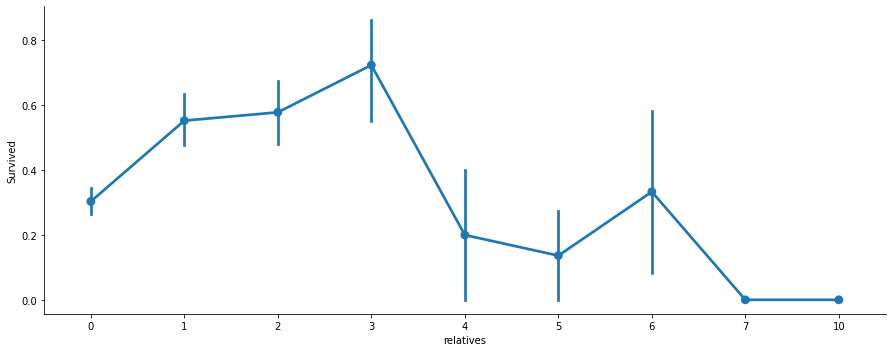

In [13]:
axes = sns.factorplot('relatives', 'Survived', data = train_df, aspect= 2.5)

**Data Preprocessing**

In [14]:
# Dropping PassengerId as it does not contribute to a persons survival.
train_df = train_df.drop(['PassengerId'], axis=1)

**Missing Data**

Cabin

In [15]:
# re stands for regular expression which provides powerful tool for matching patterns in text
# compiling is a regular expression into a pattern object with the 're.compile()' function
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8 }
data = [train_df, test_df]

for dataset in data:
  # Replacing all NaN with U0 as callling  '.search()' method will return 'None', and 
  # calling '.group()' on 'None' will raise a 'TypeError'.
  dataset['Cabin'] = dataset['Cabin'].fillna('U0')
  # lambda function is a small anonymous function without a name used as a simple funciton for a shot period of time.
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)

# Dropping the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

Age

In [16]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    # copy() methods allows to create a shallow copy of the list thus helps to keep the original list unchanged.
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()


0

Embarked

In [17]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

**Converting Features**

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


Fare

In [20]:
data = [train_df, test_df]

for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

Name

In [21]:
# Extracting the titles from the Name so as to build new feature out of it

data = [train_df, test_df]
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in data:
  #extracting titles 
  # `expand=False` tells the `str.extract` method to return a Series with one element for each row in the original dataset
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  # replace titles with a more common title or as Rare
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 
                                               'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  # convert titles into numbers
  dataset['Title'] = dataset['Title'].map(titles)
  # filling NaN with 0 to be safe
  dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


Sex

In [22]:
genders = {'male': 0, 'female': 1}
data = [train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

Ticket

In [23]:
# 'top' is the most frequent value
# 'freq' is the frequency of the most frequent value
train_df['Ticket'].describe()


count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [24]:
type(train_df['Ticket'])

pandas.core.series.Series

In [25]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

Embarked

In [26]:
ports = {'S':1, 'C':2, 'Q':3}
data = [train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)


**Creating Categories**
> Creating categories within the features:





Age

In [27]:
# data = [train_df, test_df]
# for dataset in data:
#     dataset['Age'] = dataset['Age'].astype(int)
#     dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
#     dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
#     dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
#     dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
#     dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# # let's see how it's distributed 
# train_df['Age'].value_counts()

data = [train_df, test_df]

for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[dataset['Age'] > 66, 'Age'] = 6

train_df['Age'].value_counts()

4    164
6    162
5    153
3    134
2    118
1     92
0     68
Name: Age, dtype: int64

**Fare** 
> Fare feature is not sorted on the basis of the range of the fare values into a few equally big categorires as 80% of it would fall in the first category. Therefore we wil be using the 'qcut' function from `pandas` library

In [28]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,1,1,0,8,1
1,1,1,1,5,1,0,71,2,1,0,3,3
2,1,3,1,3,0,0,7,1,0,1,8,2
3,1,1,1,5,1,0,53,1,1,0,3,3
4,0,3,0,5,0,0,8,1,0,1,8,1
5,0,3,0,3,0,0,8,3,0,1,8,1
6,0,1,0,6,0,0,51,1,0,1,5,1
7,0,3,0,0,3,1,21,1,4,0,8,4
8,1,3,1,3,0,2,11,1,2,0,8,3
9,1,2,1,1,1,0,30,2,1,0,8,3


In [29]:
pd.qcut(train_df['Fare'], q = 6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] <
                                           (26.0, 52.0] < (52.0, 512.0]]

In [30]:
data = [train_df, test_df]

for dataset in data:
  dataset.loc[dataset['Fare'] <= 7.0, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.0) & (dataset['Fare'] <= 8.0), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 8.0) & (dataset['Fare'] <= 14.0), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 14.0) & (dataset['Fare'] <= 26.0), 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.0), 'Fare'] = 4
  dataset.loc[(dataset['Fare'] > 52.0) & (dataset['Fare'] <= 512.0), 'Fare'] = 5
  dataset.loc[(dataset['Fare'] > 512.0, 'Fare')] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)


In [31]:
train_df.Fare

0      0
1      5
2      0
3      5
4      1
      ..
886    2
887    4
888    3
889    4
890    0
Name: Fare, Length: 891, dtype: int64

**Creating new Features**

Age times Class

In [32]:
data = [train_df, test_df]

for dataset in data:
  dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [33]:
train_df['relatives'] + train_df['Fare']

0      1
1      6
2      0
3      6
4      1
      ..
886    2
887    4
888    6
889    4
890    0
Length: 891, dtype: int64

Fare per Person

In [34]:
data = [train_df, test_df]

for dataset in data:
  dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
  dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,1,1,0,8,1,6,0
1,1,1,1,5,1,0,5,2,1,0,3,3,5,2
2,1,3,1,3,0,0,0,1,0,1,8,2,9,0
3,1,1,1,5,1,0,5,1,1,0,3,3,5,2
4,0,3,0,5,0,0,1,1,0,1,8,1,15,1
5,0,3,0,3,0,0,1,3,0,1,8,1,9,1
6,0,1,0,6,0,0,4,1,0,1,5,1,6,4
7,0,3,0,0,3,1,3,1,4,0,8,4,0,0
8,1,3,1,3,0,2,2,1,2,0,8,3,9,0
9,1,2,1,1,1,0,4,2,1,0,8,3,2,2


In [35]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,0,3,0,1,8,1,6,0
1,893,3,1,5,1,0,0,1,1,0,8,3,15,0
2,894,2,0,3,0,0,2,3,0,1,8,1,6,2
3,895,3,0,5,0,0,1,1,0,1,8,1,15,1
4,896,3,1,5,1,1,2,1,2,0,8,3,15,0


**Building Machine Learning Models**

In [36]:
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1).copy()

**Stochastic Gradient Descent(SGD):**

In [37]:
# `tol` is the tolerance for the stopping of the criterion. The SGD algorithm will stop early 
# if the loss( or some other measure of model fit) has not improved by at least a certain amount after a certain number of iterations.
sgd = linear_model.SGDClassifier(max_iter=5, tol = None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

**Random Forest**

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

**Logistic Regression:**

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

**K Nearest Neighbor:**

In [40]:
# KNN
knn =KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**Gaussian Naive Bayes**

In [41]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Perceptron:**

In [42]:
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


**Linear Support Vector Machine:**

In [43]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Decision Tree**

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**Which is the best Model?**

In [45]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
87.88,KNN
82.04,Perceptron
81.93,Logistic Regression
81.71,Support Vector Machines
80.92,Stochastic Gradient Decent
78.23,Naive Bayes


**K-Fold Cross Validation**

> K-Fold Cross Validation randomly splits the training data into K subsets called folds.

> If the data is split into 4 folds(K = 4), then the random forest model would be trained and evaluated 4 times, using different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

In [46]:
# K-Fold Cross validation on the random forest model using 10 folds(K=10)
# `n_estimator` is the number of trees in the random forest model.
# `cv` is the number of folds

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = 'accuracy')

print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.81111111 0.84269663 0.74157303 0.84269663 0.8988764  0.84269663
 0.82022472 0.78651685 0.86516854 0.83146067]
Mean: 0.8283021223470662
Standard Deviation: 0.04074329726218886


In [48]:
importances = pd.DataFrame({ 'feature': X_train.columns, 'importance': 
                            np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')

importances.head(15)

,importance
feature,
Title,0.203
Sex,0.166
Age_Class,0.097
Deck,0.091
Age,0.074
Fare,0.073
Pclass,0.062
Fare_Per_Person,0.057
relatives,0.053


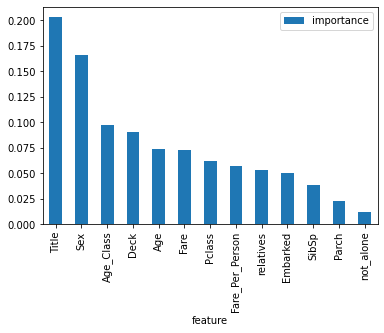

In [49]:
importances.plot.bar()

In [50]:
# As Parch and not_alone does not play a significant role, those two columns can be dropped

train_df = train_df.drop('not_alone', axis = 1)
test_df = test_df.drop('not_alone', axis = 1)

train_df = train_df.drop('Parch', axis = 1)
test_df = test_df.drop('Parch', axis = 1)

Training random forest again:

In [52]:
from numpy.random.mtrand import random
random_forest = RandomForestClassifier( n_estimators=100, oob_score= True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest, 2,), '%')

92.93 %


In [54]:
print('oob score:', round(random_forest.oob_score_, 4) * 100, '%')

oob score: 82.49 %


**Hyperparameter Tuning**

In [57]:
param_grid = { 'criterion': ['gini', 'entropy'], 'min_samples_leaf': 
              [1, 5, 10, 25, 50, 70], 'min_samples_split': 
              [2, 4, 10, 12, 16, 18, 25, 35], 'n_estimators': 
              [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1500}

**Testing new Parameters**

In [61]:
# Random Forest

random_forest = RandomForestClassifier( criterion='gini',
                                       min_samples_leaf=1,
                                       min_samples_split=4,
                                       n_estimators=1500,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print('oob score:', round(random_forest.oob_score_,4)*100, '%')

oob score: 82.72 %


**Confusion Matrix**

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

# First Row is about the not-survived-prediction. 
#   492 passengers were correctly classified as not survived (true negatives), 57 wrongly classified as not survived (false positives).
# Second Row is about the survived-prediction.
#   97 where wrongly classified as survivded (false negatives), 245 correctly classifies as survived (true positives).

array([[492,  57],
       [ 97, 245]])

**Precision and Recall**

In [64]:
from sklearn.metrics import precision_score, recall_score

print('Precision: ', precision_score(Y_train, predictions))
print('Recall: ', recall_score(Y_train, predictions))

# The model predicted 82% of the time, a passengers survival correctly( Precision).
# The recall tells us that the model predicted the survival of 73% of the people of who actually survivded.

Precision:  0.8112582781456954
Recall:  0.716374269005848


**F-Score**

In [65]:
# Mean of precision and recall gives you F-Score.

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7608695652173915

**Precision Recall Curve**